In [388]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### Start working on a real dataset

We're going to use the House Price dataset we used last time ([link text](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv))

Try to upload the dataset on your Google Drive and access it through Colab.

In [389]:
# find the file on your system and copy and paste the path here
FILE_PATH = "./content/house_prices_ex/train.csv"
df = pd.read_csv(FILE_PATH)

In [390]:
# show all the columns
pd.set_option('display.max_columns', None)
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [391]:
# print the shape of the dataset
df.shape

(1460, 81)

In [392]:
# check the data types
pd.set_option('display.max_rows', None)
print(df.dtypes)
pd.reset_option('display.max_rows')

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [393]:
# take a look at the first few records
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [394]:
# take a look at the columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<Axes: >

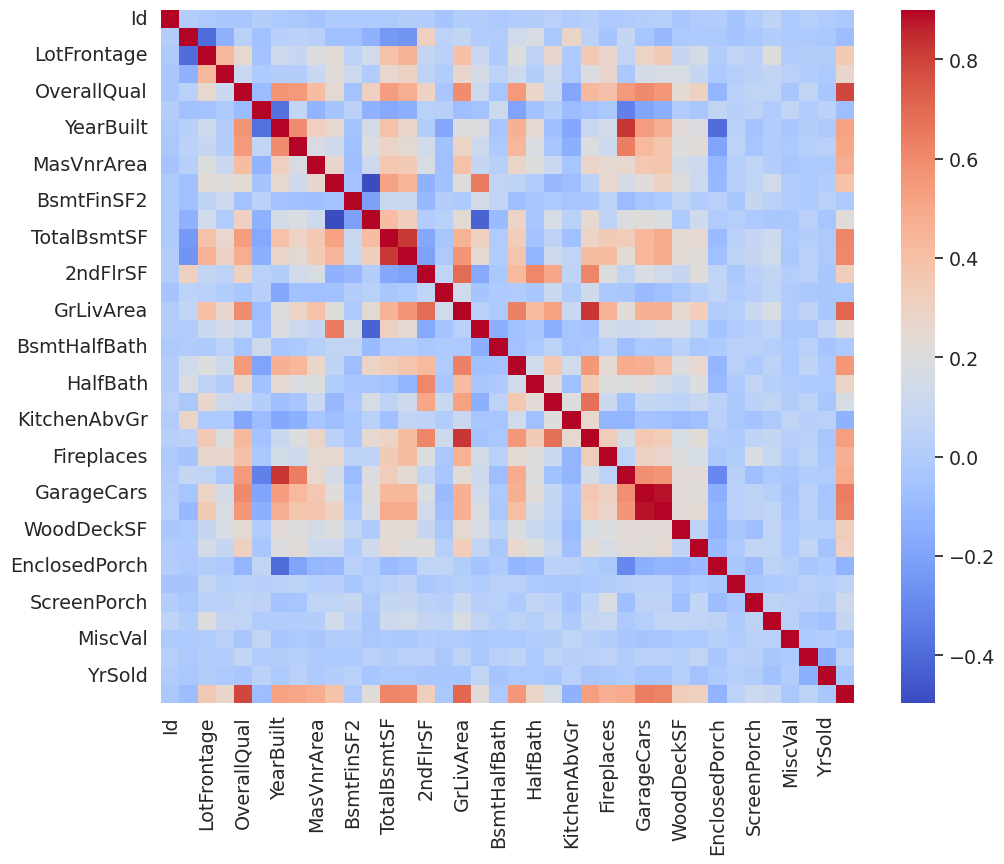

In [395]:
# look at the correlation of columns with .corr()
corrmat = df.corr(numeric_only=True)
# plot the correlations with sns.heatmap
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, cmap='coolwarm')

The highest corrolations are with the following columns:
 Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')


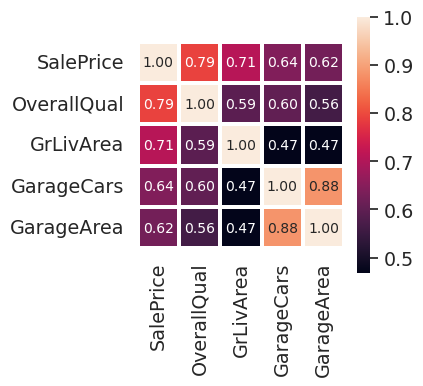

In [396]:
# run the code bellow to have a better view of corrolations
def plot_corr_matrix(df, nr_c, targ) :
    """
    A function for getting the features with the highest
    corrolation with the target variable.
    """

    # get the values
    corr = df.corr(numeric_only=True)
    corr_abs = corr.abs()

    # get the names in the largest to smallest order
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    # plot the figure
    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True,
                fmt='.2f', annot_kws={'size': 10},
                yticklabels=cols.values, xticklabels=cols.values)
    print('The highest corrolations are with the following columns:\n', cols)
    plt.show()

plot_corr_matrix(df, nr_c=5, targ='SalePrice')

In [397]:
# copy the list of columns printed out on the output of previous code cell
# and paste it here
columns_to_use = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

# filter the above columns of the dataset and save the new dataset into df_sample
df_sample = df[columns_to_use]
df_sample

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea
0,208500,7,1710,2,548
1,181500,6,1262,2,460
2,223500,7,1786,2,608
3,140000,7,1717,3,642
4,250000,8,2198,3,836
...,...,...,...,...,...
1455,175000,6,1647,2,460
1456,210000,6,2073,2,500
1457,266500,7,2340,1,252
1458,142125,5,1078,1,240


In [398]:
# look into the number of nulls we have in df_sample
df_sample.isnull().sum()

SalePrice      0
OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
dtype: int64

In [399]:
# take a look at the sampled dataset
print(df_sample.head())
print(df_sample.dtypes)
df_sample.describe()

   SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea
0     208500            7       1710           2         548
1     181500            6       1262           2         460
2     223500            7       1786           2         608
3     140000            7       1717           3         642
4     250000            8       2198           3         836
SalePrice      int64
OverallQual    int64
GrLivArea      int64
GarageCars     int64
GarageArea     int64
dtype: object


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,1.767123,472.980137
std,79442.502883,1.382997,525.480383,0.747315,213.804841
min,34900.000000,1.000000,334.000000,0.000000,0.000000
25%,129975.000000,5.000000,1129.500000,1.000000,334.500000
50%,163000.000000,6.000000,1464.000000,2.000000,480.000000
75%,214000.000000,7.000000,1776.750000,2.000000,576.000000
max,755000.000000,10.000000,5642.000000,4.000000,1418.000000


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

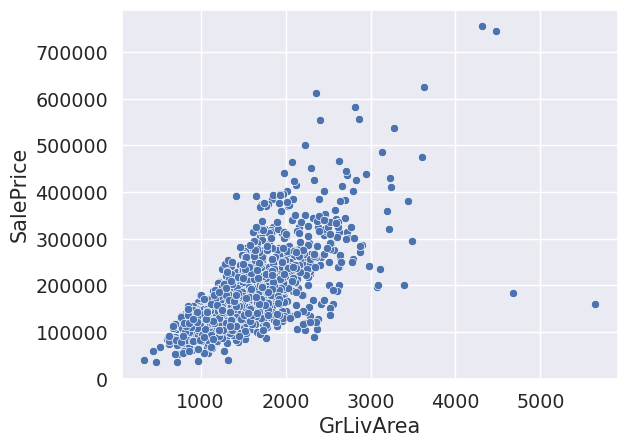

In [400]:
# plot GrLivArea against SalePrice with a scatter plot
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_sample)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

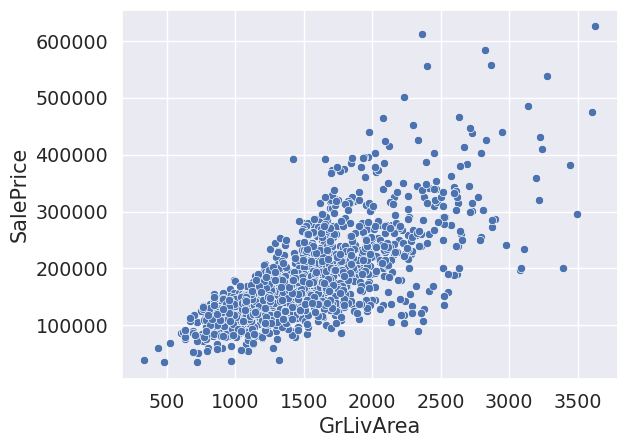

In [401]:
# Delete the outliers (ones that have GrLivArea more than 4000)
df_sample = df_sample[df_sample['GrLivArea'] < 4000]

# plot it again
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_sample)

In [402]:
# create a variable called X_columns and put all the column names
# (except for your target column name) in it
x_columns= ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

print(x_columns)

# filter df_sample based on the x_column_names and your target name
X = df_sample[x_columns]
y = df_sample['SalePrice']

# build the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']


In [403]:
# import the libraries for regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [404]:
# Initialize and train a linear regression model
lr = LinearRegression().fit(X_train, y_train)

# Make predictions
lr_y_pred = lr.predict(X_test)
# print(y_pred)

# Evaluate the model
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_mrse = np.sqrt(mean_squared_error(y_test, lr_y_pred))

print("Linear Regression:")
print(f"Mean Absolute Error: {lr_mae}")
print(f"Root Mean Squared Error: {lr_mrse}")
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Validation score: {:.2f}".format(lr.score(X_test, y_test)))

Linear Regression:
Mean Absolute Error: 27366.421544437653
Root Mean Squared Error: 35584.99433110295
Training score: 0.77
Validation score: 0.76


In [405]:
# Initialize and train a Ridge regression model
ridge = Ridge(alpha=0.01).fit(X_train, y_train)

# Make predictions
ridge_y_pred = ridge.predict(X_test)

# Evaluate the model
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_mrse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))

print("Ridge Regression:")
print(f"Mean Absolute Error: {ridge_mae}")
print(f"Root Mean Squared Error: {ridge_mrse}")
print("Training score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Validation score: {:.2f}".format(ridge.score(X_test, y_test)))

Ridge Regression:
Mean Absolute Error: 27366.403396436388
Root Mean Squared Error: 35584.997457532
Training score: 0.77
Validation score: 0.76


In [406]:
# Initialize and train a Lasso regression model
lasso = Lasso(alpha=0.1, max_iter=100).fit(X_train, y_train)

# Make predictions
lasso_y_pred = lasso.predict(X_test)

# Evaluate the model
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
lasso_mrse = np.sqrt(mean_squared_error(y_test, lasso_y_pred))

print("Lasso Regression:")
print(f"Mean Absolute Error: {lasso_mae}")
print(f"Root Mean Squared Error: {lasso_mrse}")
print("Training score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Validation score: {:.2f}".format(lasso.score(X_test, y_test)))

Lasso Regression:
Mean Absolute Error: 27366.435783088946
Root Mean Squared Error: 35585.03218502003
Training score: 0.77
Validation score: 0.76


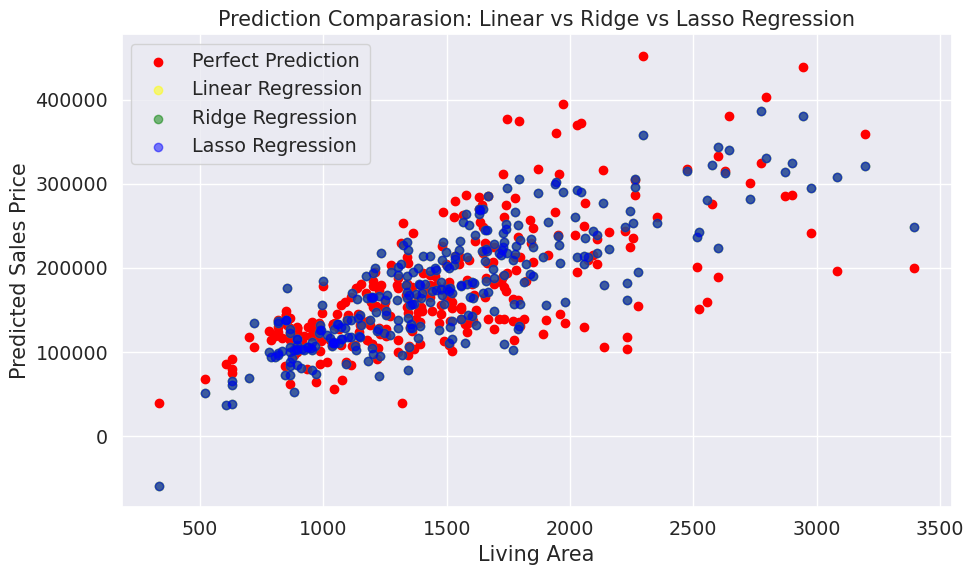

In [407]:
import matplotlib.pyplot as plt
col = 'GrLivArea'

plt.figure(figsize=(10, 6))

# Add a reference line for a perfect prediction (y_test = predictions)
plt.scatter(X_test[col], y_test, color='red', label='Perfect Prediction')

# Create a scatter plot for Linear Regression
plt.scatter(X_test[col], lr_y_pred, color='yellow', alpha=0.5, label='Linear Regression')

# Create a scatter plot for Ridge Regression
plt.scatter(X_test[col], ridge_y_pred, color='green', alpha=0.5, label='Ridge Regression')

# Create a scatter plot for Lasso Regression
plt.scatter(X_test[col], lasso_y_pred, color='blue', alpha=0.5, label='Lasso Regression')

# Set plot labels and title
plt.legend()
plt.xlabel('Living Area')
plt.ylabel('Predicted Sales Price')
plt.title("Prediction Comparasion: Linear vs Ridge vs Lasso Regression")

# Show the plot
plt.tight_layout()
plt.show()


* How are weights calculated: [link](https://towardsdatascience.com/step-by-step-tutorial-on-linear-regression-with-stochastic-gradient-descent-1d35b088a843)

* Why is Lasso harder on coefficients in comparison to Ridge? [link](https://online.stat.psu.edu/stat508/lesson/5/5.4)

* Regression requirements: [link](https://www.youtube.com/watch?v=0MFpOQRY0rw&ab_channel=zedstatistics)

* Linear regression in sklearn: [link](https://scikit-learn.org/stable/modules/linear_model.html#linear-models)

* Lasso Regression


### Add and convert categorical columns to numerical

In [408]:
# filter the dataset based on the following columns
columns_to_use = ['LotArea', 'YrSold', 'GarageArea', 'GarageYrBlt',
                  'GrLivArea', 'OverallQual', 'ExterQual', 'YearBuilt',
                  'MSZoning', 'KitchenQual',
                  'SalePrice']

# save the new dataset into df_sample
df_sample = df[columns_to_use]

In [409]:
# take a look at the dataset
print(df_sample.head())
print(df_sample.dtypes)
df_sample.describe()

   LotArea  YrSold  GarageArea  GarageYrBlt  GrLivArea  OverallQual ExterQual  \
0     8450    2008         548       2003.0       1710            7        Gd   
1     9600    2007         460       1976.0       1262            6        TA   
2    11250    2008         608       2001.0       1786            7        Gd   
3     9550    2006         642       1998.0       1717            7        TA   
4    14260    2008         836       2000.0       2198            8        Gd   

   YearBuilt MSZoning KitchenQual  SalePrice  
0       2003       RL          Gd     208500  
1       1976       RL          TA     181500  
2       2001       RL          Gd     223500  
3       1915       RL          Gd     140000  
4       2000       RL          Gd     250000  
LotArea          int64
YrSold           int64
GarageArea       int64
GarageYrBlt    float64
GrLivArea        int64
OverallQual      int64
ExterQual       object
YearBuilt        int64
MSZoning        object
KitchenQual     object
S

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,2007.815753,472.980137,1978.506164,1515.463699,6.099315,1971.267808,180921.195890
std,9981.264932,1.328095,213.804841,24.689725,525.480383,1.382997,30.202904,79442.502883
min,1300.000000,2006.000000,0.000000,1900.000000,334.000000,1.000000,1872.000000,34900.000000
25%,7553.500000,2007.000000,334.500000,1961.000000,1129.500000,5.000000,1954.000000,129975.000000
50%,9478.500000,2008.000000,480.000000,1980.000000,1464.000000,6.000000,1973.000000,163000.000000
75%,11601.500000,2009.000000,576.000000,2002.000000,1776.750000,7.000000,2000.000000,214000.000000
max,215245.000000,2010.000000,1418.000000,2010.000000,5642.000000,10.000000,2010.000000,755000.000000


In [410]:
# look into the number of nulls we have
# (sort the values to have the emptiest column on top)
df_sample.isnull().sum().sort_values(ascending=False)

GarageYrBlt    81
LotArea         0
YrSold          0
GarageArea      0
GrLivArea       0
OverallQual     0
ExterQual       0
YearBuilt       0
MSZoning        0
KitchenQual     0
SalePrice       0
dtype: int64

In [411]:
# fillna with mean for: GarageYrBlt
df_sample['GarageYrBlt'].fillna(df_sample['GarageYrBlt'].mean(), inplace=True)

/tmp/ipykernel_488/2175728811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['GarageYrBlt'].fillna(df_sample['GarageYrBlt'].mean(), inplace=True)


In [412]:
# Check if nulls have been filled
df_sample.isnull().sum().sort_values(ascending=False)

LotArea        0
YrSold         0
GarageArea     0
GarageYrBlt    0
GrLivArea      0
OverallQual    0
ExterQual      0
YearBuilt      0
MSZoning       0
KitchenQual    0
SalePrice      0
dtype: int64

In [413]:
# import the label encoder
from sklearn.preprocessing import LabelEncoder

# create a second dataset from the first dataset
df_transformed = df_sample.copy()

# define the categorical columns
cols = ('KitchenQual', 'ExterQual', 'MSZoning')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(df_transformed[c].values))
    df_transformed[c] = lbl.transform(list(df_transformed[c].values))



In [414]:
# look at the transformed version
# is everything looking good?
df_transformed

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,MSZoning,KitchenQual,SalePrice
0,8450,2008,548,2003.0,1710,7,2,2003,3,2,208500
1,9600,2007,460,1976.0,1262,6,3,1976,3,3,181500
2,11250,2008,608,2001.0,1786,7,2,2001,3,2,223500
3,9550,2006,642,1998.0,1717,7,3,1915,3,2,140000
4,14260,2008,836,2000.0,2198,8,2,2000,3,2,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,3,1999,3,3,175000
1456,13175,2010,500,1978.0,2073,6,3,1978,3,3,210000
1457,9042,2010,252,1941.0,2340,7,0,1941,3,2,266500
1458,9717,2010,240,1950.0,1078,5,3,1950,3,2,142125


In [415]:
# Now let's go back to the original dataset "df_sample" by saving it in df_transformed to try another type of encoding
df_transformed = df_sample.copy()
df_transformed

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,MSZoning,KitchenQual,SalePrice
0,8450,2008,548,2003.0,1710,7,Gd,2003,RL,Gd,208500
1,9600,2007,460,1976.0,1262,6,TA,1976,RL,TA,181500
2,11250,2008,608,2001.0,1786,7,Gd,2001,RL,Gd,223500
3,9550,2006,642,1998.0,1717,7,TA,1915,RL,Gd,140000
4,14260,2008,836,2000.0,2198,8,Gd,2000,RL,Gd,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,TA,1999,RL,TA,175000
1456,13175,2010,500,1978.0,2073,6,TA,1978,RL,TA,210000
1457,9042,2010,252,1941.0,2340,7,Ex,1941,RL,Gd,266500
1458,9717,2010,240,1950.0,1078,5,TA,1950,RL,Gd,142125


In [416]:
# use ordinal encoder to transform kitchen quality (KitchenQual)
from sklearn.preprocessing import OrdinalEncoder

order = ['Fa','TA','Gd','Ex']
columns_with_order = ['ExterQual', 'KitchenQual']

for col in columns_with_order:
    ord_en = OrdinalEncoder(categories=[order])
    df_transformed[col] = ord_en.fit_transform(df_transformed[[col]])


In [417]:
# take a look at the kitchQual in df_sample
df_sample.loc[:, 'KitchenQual'].values

array(['Gd', 'TA', 'Gd', ..., 'Gd', 'Gd', 'TA'], dtype=object)

In [418]:
# take a look at the kitchQual in df_transformed
df_transformed.loc[:, 'KitchenQual'].values

array([2., 1., 2., ..., 2., 2., 1.])

In [419]:
# Specify the columns to be one-hot encoded (MSZoning)
# Perform one-hot encoding
encoded_df = pd.get_dummies(df_transformed[['MSZoning']])

# Concatenate the encoded columns with the original dataset
df_transformed = pd.concat([df_transformed, encoded_df], axis=1)

# Display the modified dataset
df_transformed

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,MSZoning,KitchenQual,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,8450,2008,548,2003.0,1710,7,2.0,2003,RL,2.0,208500,False,False,False,True,False
1,9600,2007,460,1976.0,1262,6,1.0,1976,RL,1.0,181500,False,False,False,True,False
2,11250,2008,608,2001.0,1786,7,2.0,2001,RL,2.0,223500,False,False,False,True,False
3,9550,2006,642,1998.0,1717,7,1.0,1915,RL,2.0,140000,False,False,False,True,False
4,14260,2008,836,2000.0,2198,8,2.0,2000,RL,2.0,250000,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,1.0,1999,RL,1.0,175000,False,False,False,True,False
1456,13175,2010,500,1978.0,2073,6,1.0,1978,RL,1.0,210000,False,False,False,True,False
1457,9042,2010,252,1941.0,2340,7,3.0,1941,RL,2.0,266500,False,False,False,True,False
1458,9717,2010,240,1950.0,1078,5,1.0,1950,RL,2.0,142125,False,False,False,True,False


In [420]:
# drop the columns you transformed and keep the converted versions
df_transformed.drop(columns=['MSZoning'], inplace=True)

In [421]:
# define the variables we want to use for X (everything except for 'SalePrice')
X_columns = [col for col in df_transformed.columns if col != 'SalePrice']

# create X and y
X = df_transformed.loc[:, X_columns]
y = df_transformed.loc[:, 'SalePrice']

# build the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [422]:
# View X_train. Is everything looking good?
X_train

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,KitchenQual,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
254,8400,2010,294,1957.000000,1314,5,1.0,1957,1.0,False,False,False,True,False
1066,7837,2009,380,1993.000000,1571,6,2.0,1993,1.0,False,False,False,True,False
638,8777,2008,0,1978.506164,796,5,1.0,1910,1.0,False,False,False,True,False
799,7200,2007,240,1939.000000,1768,5,1.0,1937,2.0,False,False,False,True,False
380,5000,2010,308,1924.000000,1691,5,1.0,1924,2.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,9317,2007,440,2006.000000,1314,6,2.0,2006,2.0,False,False,False,True,False
1130,7804,2009,576,1981.000000,1981,4,1.0,1928,2.0,False,False,False,True,False
1294,8172,2006,572,1957.000000,864,5,1.0,1955,1.0,False,False,False,True,False
860,7642,2007,216,1925.000000,1426,7,2.0,1918,2.0,False,False,False,True,False


In [423]:
# Initialize and train a linear regression model
lr = LinearRegression().fit(X_train, y_train)

# Make predictions
lr_y_pred = lr.predict(X_test)
# print(y_pred)

# Evaluate the model
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_mrse = np.sqrt(mean_squared_error(y_test, lr_y_pred))

print("Linear Regression:")
print(f"Mean Absolute Error: {lr_mae}")
print(f"Root Mean Squared Error: {lr_mrse}")
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Validation score: {:.2f}".format(lr.score(X_test, y_test)))

Linear Regression:
Mean Absolute Error: 24122.961199708654
Root Mean Squared Error: 38888.57581344031
Training score: 0.78
Validation score: 0.80


In [424]:
# Initialize and train a Ridge regression model
ridge = Ridge(alpha=0.01).fit(X_train, y_train)

# Make predictions
ridge_y_pred = ridge.predict(X_test)

# Evaluate the model
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_mrse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))

print("Ridge Regression:")
print(f"Mean Absolute Error: {ridge_mae}")
print(f"Root Mean Squared Error: {ridge_mrse}")
print("Training score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Validation score: {:.2f}".format(ridge.score(X_test, y_test)))

Ridge Regression:
Mean Absolute Error: 24123.037615231544
Root Mean Squared Error: 38888.684110959875
Training score: 0.78
Validation score: 0.80


In [425]:
# Initialize and train a Lasso regression model
lasso = Lasso(alpha=0.1, max_iter=100).fit(X_train, y_train)

# Make predictions
lasso_y_pred = lasso.predict(X_test)

# Evaluate the model
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
lasso_mrse = np.sqrt(mean_squared_error(y_test, lasso_y_pred))

print("Lasso Regression:")
print(f"Mean Absolute Error: {lasso_mae}")
print(f"Root Mean Squared Error: {lasso_mrse}")
print("Training score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Validation score: {:.2f}".format(lasso.score(X_test, y_test)))

Lasso Regression:
Mean Absolute Error: 24123.138695099762
Root Mean Squared Error: 38888.774310164896
Training score: 0.78
Validation score: 0.80


/home/mik/.conda/envs/tensorflow_ml/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.231e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


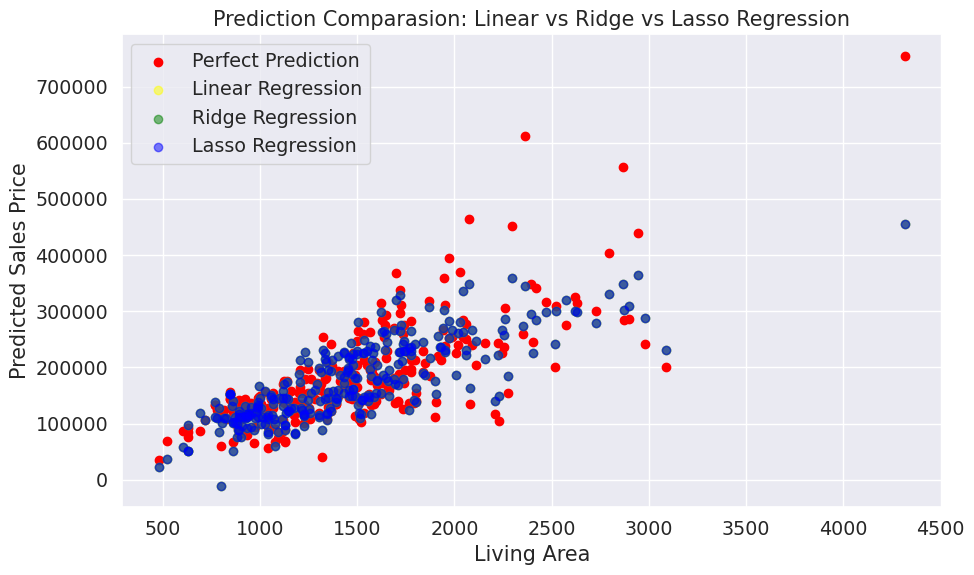

In [426]:
import matplotlib.pyplot as plt
col = 'GrLivArea'

plt.figure(figsize=(10, 6))

# Add a reference line for a perfect prediction (y_test = predictions)
plt.scatter(X_test[col], y_test, color='red', label='Perfect Prediction')

# Create a scatter plot for Linear Regression
plt.scatter(X_test[col], lr_y_pred, color='yellow', alpha=0.5, label='Linear Regression')

# Create a scatter plot for Ridge Regression
plt.scatter(X_test[col], ridge_y_pred, color='green', alpha=0.5, label='Ridge Regression')

# Create a scatter plot for Lasso Regression
plt.scatter(X_test[col], lasso_y_pred, color='blue', alpha=0.5, label='Lasso Regression')

# Set plot labels and title
plt.legend()
plt.xlabel('Living Area')
plt.ylabel('Predicted Sales Price')
plt.title("Prediction Comparasion: Linear vs Ridge vs Lasso Regression")

# Show the plot
plt.tight_layout()
plt.show()


### Optional for now

### What if we didn't have normalized features?


In [427]:
# Calculate the mean and standard deviation for each feature
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)

# Normalize the features using z-score standardization
X_normalized = (X - mean) / std_dev

# Now, X_normalized contains your normalized features
X_normalized

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,KitchenQual,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,-0.207142,0.138777,0.351000,1.021157,0.370333,0.651479,1.052302,1.050994,0.735994,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
1,-0.091886,-0.614439,-0.060731,-0.104483,-0.482512,-0.071836,-0.689604,0.156734,-0.771091,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
2,0.073480,0.138777,0.631726,0.937776,0.515013,0.651479,1.052302,0.984752,0.735994,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
3,-0.096897,-1.367655,0.790804,0.812705,0.383659,0.651479,-0.689604,-1.863632,0.735994,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
4,0.375148,0.138777,1.698485,0.896086,1.299326,1.374795,1.052302,0.951632,0.735994,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,-0.614439,-0.060731,0.854395,0.250402,-0.071836,-0.689604,0.918511,-0.771091,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
1456,0.266407,1.645210,0.126420,-0.021102,1.061367,-0.071836,-0.689604,0.222975,-0.771091,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
1457,-0.147810,1.645210,-1.033914,-1.563645,1.569647,0.651479,2.794208,-1.002492,0.735994,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
1458,-0.080160,1.645210,-1.090059,-1.188432,-0.832788,-0.795151,-0.689604,-0.704406,0.735994,-0.083045,-0.215859,-0.105263,0.518133,-0.418955


In [428]:
#  other ways of doing this
from sklearn.preprocessing import StandardScaler

# Assuming you have a numpy array called 'X' containing your features
# X.shape should be (number_of_samples, number_of_features)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data and transform the features
X_normalized = scaler.fit_transform(X)

# X_normalized contains your z-score standardized features
X_normalized

array([[-0.20714171,  0.13877749,  0.35100032, ..., -0.10526316,
         0.51813339, -0.41895507],
       [-0.09188637, -0.61443862, -0.06073101, ..., -0.10526316,
         0.51813339, -0.41895507],
       [ 0.07347998,  0.13877749,  0.63172623, ..., -0.10526316,
         0.51813339, -0.41895507],
       ...,
       [-0.14781027,  1.64520971, -1.03391416, ..., -0.10526316,
         0.51813339, -0.41895507],
       [-0.08016039,  1.64520971, -1.09005935, ..., -0.10526316,
         0.51813339, -0.41895507],
       [-0.05811155,  0.13877749, -0.9216238 , ..., -0.10526316,
         0.51813339, -0.41895507]])

In [429]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a numpy array called 'X' containing your features
# X.shape should be (number_of_samples, number_of_features)

# Create a MinMaxScaler instance (by default, scales to [0, 1])
scaler = MinMaxScaler()

# Fit the scaler to your data and transform the features
X_normalized = scaler.fit_transform(X)

# X_normalized contains your min-max scaled features
X_normalized

array([[0.0334198 , 0.5       , 0.3864598 , ..., 0.        , 1.        ,
        0.        ],
       [0.03879502, 0.25      , 0.32440056, ..., 0.        , 1.        ,
        0.        ],
       [0.04650728, 0.5       , 0.42877292, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.03618687, 1.        , 0.17771509, ..., 0.        , 1.        ,
        0.        ],
       [0.03934189, 1.        , 0.16925247, ..., 0.        , 1.        ,
        0.        ],
       [0.04037019, 0.5       , 0.19464034, ..., 0.        , 1.        ,
        0.        ]])